# 투빅스 15기 정규세션 Week1 EDA - 14기 이혜린

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

## 1. 데이터 불러오기

In [4]:
dat = pd.read_csv("example.csv", encoding="UTF8")

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    case_id                  117 non-null    int64  
 1   province_x                117 non-null    object 
 2   city                      117 non-null    object 
 3   group                     117 non-null    bool   
 4   infection_case            117 non-null    object 
 5   confirmed                 117 non-null    int64  
 6   latitude_x                117 non-null    object 
 7   longitude_x               117 non-null    object 
 8   elementary_school_count   117 non-null    int64  
 9   kindergarten_count        117 non-null    int64  
 10  university_count          117 non-null    int64  
 11  academy_ratio             117 non-null    float64
 12  elderly_population_ratio  117 non-null    float64
 13  elderly_alone_ratio       117 non-null    float64
 14  nursing_ho

In [6]:
dat.describe() # numeric variable에 대한 정보 출력

,case_id,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.912830e+06,179.324786,27.965812,44.547009,1.641026,1.623333,17.026923,7.692308,702.427350
std,1.605029e+06,819.341523,19.200813,37.317486,2.110979,0.851856,5.479777,3.566297,633.461962
min,1.000001e+06,0.000000,4.000000,4.000000,0.000000,0.360000,9.080000,3.800000,47.000000
25%,1.000025e+06,5.000000,14.000000,17.000000,0.000000,1.000000,13.170000,5.300000,323.000000
50%,1.200005e+06,10.000000,23.000000,35.000000,1.000000,1.430000,16.180000,6.700000,593.000000
75%,1.500005e+06,39.000000,33.000000,58.000000,3.000000,1.910000,20.290000,9.000000,765.000000
max,6.100007e+06,4511.000000,110.000000,195.000000,10.000000,4.180000,36.550000,21.000000,3088.000000


In [22]:
print('data shape : {}'.format(dat.shape))

data shape : (117, 15)


## 2. 데이터 
  
### Target Variable = `confirmed`

In [7]:
dat.head()

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741
4,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343,26,34,3,1.00,16.21,5.7,741


In [8]:
dat.rename(columns={' case_id':'id',
                   'province_x':'province',
                   'latitude_x':'lat',
                   'longitude_x': 'lon'}, inplace=True)
print(dat.columns.values)

['id' 'province' 'city' 'group' 'infection_case' 'confirmed' 'lat' 'lon'
 'elementary_school_count' 'kindergarten_count' 'university_count'
 'academy_ratio' 'elderly_population_ratio' 'elderly_alone_ratio'
 'nursing_home_count']


### 범주형 변수 분석

In [11]:
print('province : {}'.format(len(np.unique(dat.province))))
print('city : {}'.format(len(np.unique(dat.city))))
print('group : {}'.format(len(np.unique(dat.group))))
print('infection_case : {}'.format(len(np.unique(dat.infection_case))))

province : 13
city : 44
group : 1
infection_case : 67


In [12]:
np.unique(dat.group)

array([ True])

In [13]:
np.unique(dat.infection_case)

array(['Anyang Gunpo Pastors Group', 'Biblical Language study meeting',
       'Bonghwa Pureun Nursing Home', 'Bundang Jesaeng Hospital',
       'Changnyeong Coin Karaoke', 'Cheongdo Daenam Hospital',
       'Coupang Logistics Center', 'Daesil Convalescent Hospital',
       'Daezayeon Korea', 'Day Care Center', 'Dongan Church',
       'Dreaming Church', 'Dunsan Electronics Town',
       "Eunpyeong St. Mary's Hospital", 'Fatima Hospital',
       'Gangnam Dongin Church', 'Gangnam Yeoksam-dong gathering',
       'Geochang Church', 'Geochang-gun Woongyang-myeon',
       'Geumcheon-gu rice milling machine manufacture',
       'Goesan-gun Jangyeon-myeon', 'Gumi Elim Church',
       'Guro-gu Call Center', 'Gwangneuksa Temple',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Gyeongsan Seorin Nursing Home',
       'Haeundae-gu Catholic Church', 'Hanmaeum Changwon Hospital',
       'Hansarang Convalescent Hospital', 'Itaewon Clubs',
       'Jongno Community 

Variable|Unique|Explanation
:-|:-|:-
province|13|광역시 및 도
city|44|시, 군, 구
group|1|True 밖에 없음 = 위 자료는 **집단감염 케이스만을** 다루고 있음을 알 수 있다.
infection_case|67|`infection_case` 변수의 값으로 overseas_inflow 가 없는 것으로 보아 이 자료는 **지역발생 케이스**만을 다루고 있음을 확인할 수 있다.  
  
  unique 개수가 적당한 범주형 변수는 `province`가 유일하다.  
  다른 변수들도 범주를 합쳐서 범주 개수를 적당히 줄인다면 데이터 분석에 사용할 수 있을 것이다.

### 결측치 확인

In [16]:
dat.isna().sum()

id                          0
province                    0
city                        0
group                       0
infection_case              0
confirmed                   0
lat                         0
lon                         0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [8]:
dat.isnull().sum()

id                          0
province                    0
city                        0
group                       0
infection_case              0
confirmed                   0
lat                         0
lon                         0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

In [9]:
print(dat['lat'].unique())
print(dat['lon'].unique())

['37.538621' '37.48208' '37.481735' '37.508163' '37.481059' '37.486837'
 '37.546061' '37.524623' '37.679422' '37.592888' '37.63369' '37.55713'
 '37.57681' '37.594782' '37.48825' '-' '37.522331' '37.498279' '37.562405'
 '37.560899' '37.565699' '37.558147' '37.520846' '37.559649' '35.21628'
 '35.16708' '35.20599' '35.84008' '35.857375' '35.857393' '35.885592'
 '36.3400973' '36.3398739' '36.346869' '36.358123' '35.88395' '35.136035'
 '36.504713' '36.48025' '37.455687' '37.38833' '37.530579' '37.758635'
 '37.381784' '37.403722' '37.287356' '37.2376' '37.342762' '36.82422'
 '36.81503' '37.000354' '35.078825' '35.64887' '36.92757' '35.782149'
 '35.84819' '35.82558' '36.0581' '35.68556' '35.805681' '35.164845'
 '35.22115' '35.54127' '35.338811']
['126.992652' '126.901384' '126.930121' '126.884387' '126.894343'
 '126.893163' '126.874209' '126.843118' '127.044374' '127.056766'
 '126.9165' '127.0403' '127.006' '126.968022' '127.08559' '-' '127.057388'
 '127.030139' '126.984377' '126.966998' '126

NA 값은 없었으나 '-'값(**이상한 값...**) 이 있음을 발견했다. 이를 NA로 변경.

In [21]:
dat.lon

0      126.992652
1      126.901384
2      126.930121
3      126.884387
4      126.894343
          ...    
112    127.917805
113    128.126969
114      128.6866
115      128.5008
116    129.017508
Name: lon, Length: 117, dtype: object

In [20]:
dat.lat

0      37.538621
1       37.48208
2      37.481735
3      37.508163
4      37.481059
         ...    
112    35.805681
113    35.164845
114     35.22115
115     35.54127
116    35.338811
Name: lat, Length: 117, dtype: object

In [10]:
dat['lat'] = dat['lat'].apply(lambda x: None if x=="-" else x)
dat['lon'] = dat['lon'].apply(lambda x: None if x=="-" else x)
dat['lat'] = pd.to_numeric(dat['lat'])
dat['lon'] = pd.to_numeric(dat['lon'])

dat[(dat['lat'].isnull() == True ) | (dat['lon'].isnull() == True)]

,id,province,city,group,infection_case,confirmed,lat,lon,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
15,1000018,Seoul,Gangnam-gu,True,Gangnam Yeoksam-dong gathering,6,NaN,NaN,33,38,0,4.18,13.17,4.3,3088
37,1000020,Seoul,Geumcheon-gu,True,Geumcheon-gu rice milling machine manufacture,6,NaN,NaN,18,19,0,0.96,16.15,6.7,475
39,1000027,Seoul,Seocho-gu,True,Seocho Family,5,NaN,NaN,24,27,1,2.60,13.39,3.8,1465
92,2000019,Gyeonggi-do,Seongnam-si,True,Seongnam neighbors gathering,5,NaN,NaN,72,127,3,2.08,13.52,5.6,2095
110,6000010,Gyeongsangbuk-do,Gumi-si,True,Gumi Elim Church,10,NaN,NaN,50,104,3,1.96,9.08,4.3,616


#### `lat` , `lon` 결측치 대체

같은 구에서 발생한 케이스가 여러개인 obs15 와 obs 92는 각 구별 위도와 경도의 평균값으로 결측치를 대체한다.  
(위치 정보이기 때문에 평균값을 넣는 것이 가장 적절하다고 판단했기 때문이다.)  
대체할 평균이 없는 나머지 obs들은 위경도 값을 개별적으로 찾아서 넣어준다. # 출처 : Google map 좌표값 이용

In [11]:
dat.loc[15,'lat'] = dat[dat['city'] == 'Gangnam-gu']['lat'].mean() #강남구 데이터의 평균 위도 및 경도로 대체
dat.loc[15,'lon'] = dat[dat['city'] == 'Gangnam-gu']['lon'].mean()
dat.loc[92,'lat'] = dat[dat['city'] == 'Seongnam-si']['lat'].mean() #성남시 데이터의 평균 위도 및 경도로 대체
dat.loc[92,'lon'] = dat[dat['city'] == 'Seongnam-si']['lon'].mean()

dat.loc[37,'lat'] , dat.loc[37,'lon'] = [37.4599845,126.866247]
dat.loc[39,'lat'] , dat.loc[39,'lon'] = [37.4760053,126.9671619]
dat.loc[110,'lat'], dat.loc[110,'lon'] = [36.1147949,128.3389805]

### 수치형 변수의 이상치 제거 및 분석

In [12]:
num_att = ["confirmed", "elementary_school_count", "kindergarten_count", "university_count", 
           "academy_ratio", "elderly_population_ratio", "elderly_alone_ratio", "nursing_home_count"] #id, group, lat, lon 제외
dat[num_att].describe()

,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,179.324786,27.965812,44.547009,1.641026,1.623333,17.026923,7.692308,702.427350
std,819.341523,19.200813,37.317486,2.110979,0.851856,5.479777,3.566297,633.461962
min,0.000000,4.000000,4.000000,0.000000,0.360000,9.080000,3.800000,47.000000
25%,5.000000,14.000000,17.000000,0.000000,1.000000,13.170000,5.300000,323.000000
50%,10.000000,23.000000,35.000000,1.000000,1.430000,16.180000,6.700000,593.000000
75%,39.000000,33.000000,58.000000,3.000000,1.910000,20.290000,9.000000,765.000000
max,4511.000000,110.000000,195.000000,10.000000,4.180000,36.550000,21.000000,3088.000000


Text(0.5, 0.98, 'outlier 제거 전 수치형 변수 히스토그램')

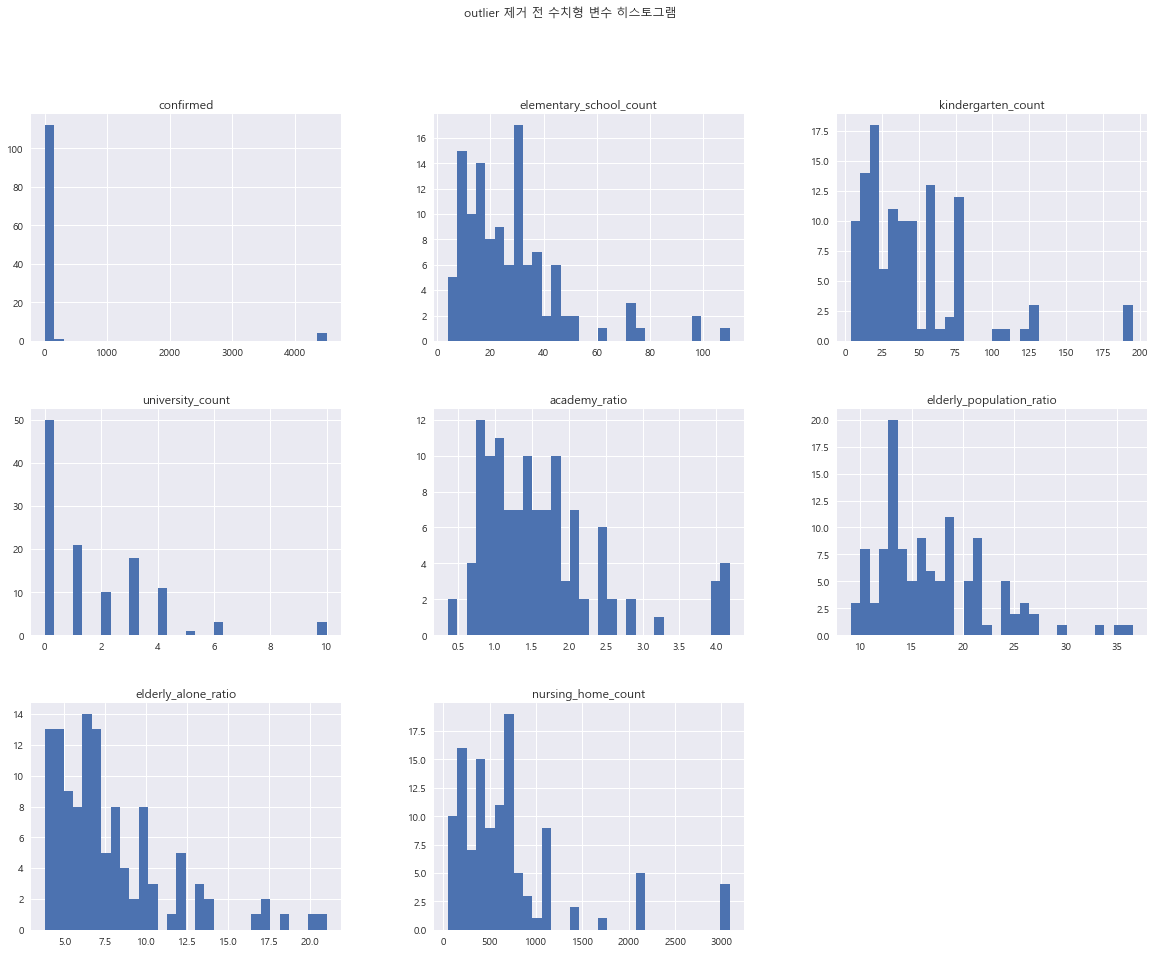

In [13]:
dat[num_att].hist(bins=30, figsize=(20,15))
plt.suptitle("outlier 제거 전 수치형 변수 히스토그램", fontsize=12)

`confirmed` 변수에서 이상치로 의심되는 값(약 4000)이 있어보인다.  
box plot을 통해 확인해본 후, 확진자 수가 많은 순으로 데이터셋을 정렬한 후 관찰한다.

In [14]:
dat_sorted_by_confirmed = dat.sort_values(by='confirmed' ,ascending=False)
dat_sorted_by_confirmed.head(5)

,id,province,city,group,infection_case,confirmed,lat,lon,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
45,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.840080,128.566700,21,27,4,1.24,19.13,7.9,475
46,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.840080,128.566700,11,15,2,0.85,22.49,10.4,345
47,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.840080,128.566700,23,44,4,2.63,16.76,7.5,427
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.840080,128.566700,30,44,1,3.23,11.42,4.8,765
49,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651,32,47,1,1.51,12.11,5.4,361


이상치로 의심됐으나 `infection_case`를 보아 의미있는 obs라고 생각되므로 유지시켜도 될 것 같다.  
하지만, EDA에서 분포 plot을 그릴 때에는 장애물이 될 때가 있기 때문에 확진자수가 4000이상인 obs를 **제거**한 `df` 데이터셋을 일단 생성한다.  
(경우에 따라 번갈아 사용)

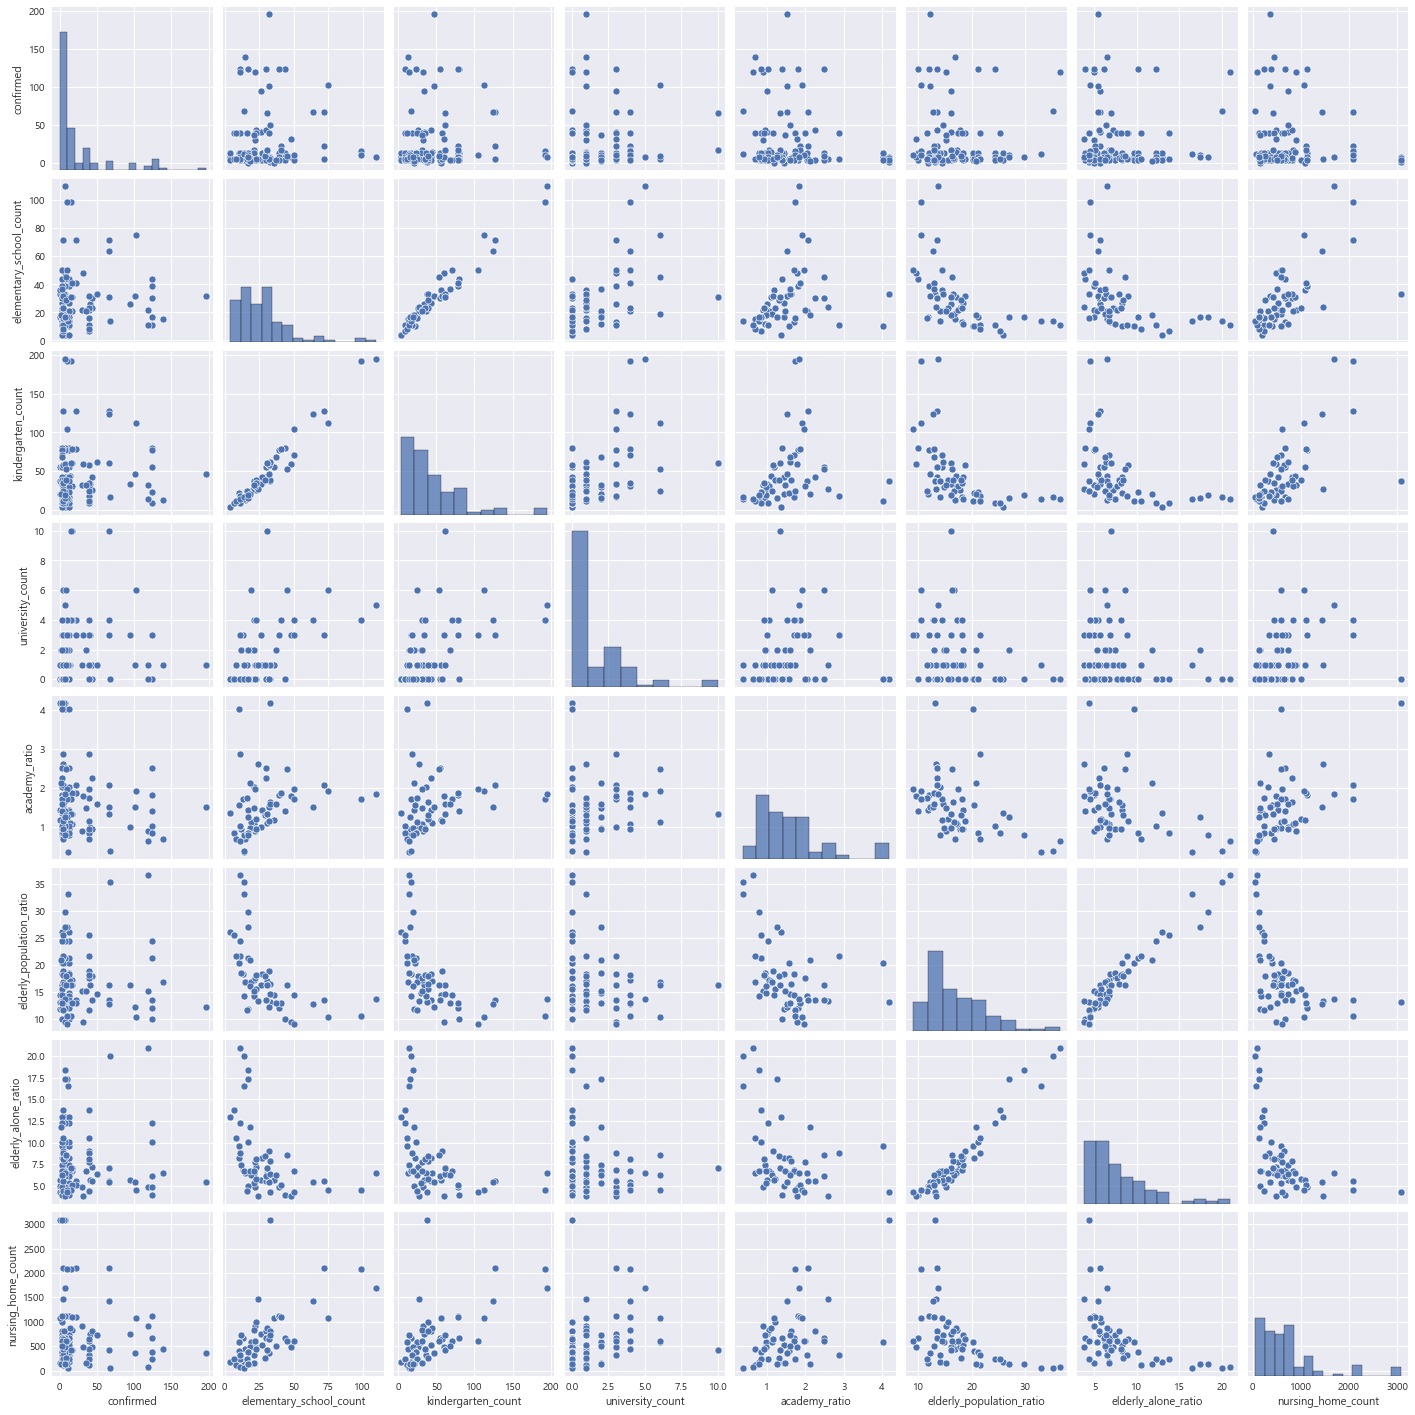

In [15]:
df = dat[dat["confirmed"]<1000] # 이상치 제거 후 데이터셋
sns.pairplot(df[num_att]) # 이상치 제거 후 각 변수 분포 및 변수간 scatter plot 작성

In [16]:
dat[num_att].corr()

,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
confirmed,1.000000,-0.063664,-0.058887,0.100718,0.073367,0.014509,-0.002139,-0.062933
elementary_school_count,-0.063664,1.000000,0.975891,0.398693,0.199893,-0.596355,-0.501528,0.599078
kindergarten_count,-0.058887,0.975891,1.000000,0.408946,0.165559,-0.590085,-0.494945,0.546398
university_count,0.100718,0.398693,0.408946,1.000000,-0.039981,-0.215478,-0.220113,0.111657
academy_ratio,0.073367,0.199893,0.165559,-0.039981,1.000000,-0.360320,-0.355920,0.574332
elderly_population_ratio,0.014509,-0.596355,-0.590085,-0.215478,-0.360320,1.000000,0.962650,-0.464517
elderly_alone_ratio,-0.002139,-0.501528,-0.494945,-0.220113,-0.355920,0.962650,1.000000,-0.500722
nursing_home_count,-0.062933,0.599078,0.546398,0.111657,0.574332,-0.464517,-0.500722,1.000000


확진자수 (`confirmed`) 와 상관관계가 상대적으로 강해보이는 변수는 `elementary_school_count`, `kindergarten_count`, `university_count`, `academy_ratio`, 그리고 `nursing_home_count`이다.  
추후 분석 시 주의깊게 살펴봐야 할 필요가 있다.

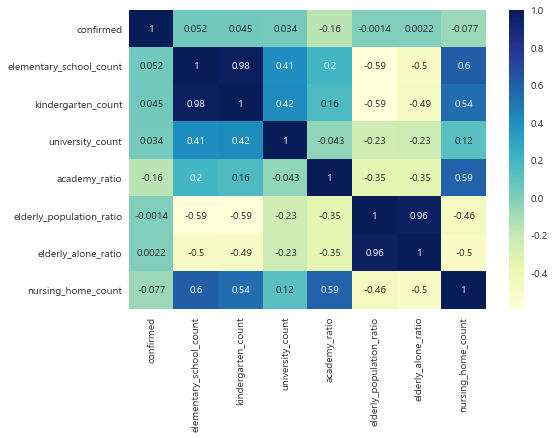

In [17]:
sns.heatmap(df[num_att].corr(),cmap='YlGnBu', annot=True)
plt.show()

`elmentary_school_count` 와 `kindergarten_count` , 그리고 `elderly_population_ratio` 와 `elderly_alone_ratio` 간에 선형관계가 있다.  
이는 분석시 다중공선성 문제를 일으킬 수 있기 때문에 Ridge Estimator 등의 방법으로 후에 해결할 필요가 있다.

### 수치형 변수에 대해 로그 변환 ###  
  
위의 pairplot을 보면 알 수 있듯이 대부분의 변수가 왼쪽으로 많이 치우쳐있다.  
그러므로 수치형 변수에 로그변환을 진행하여 정규분포에 근사하게 만들어 준다.  
  
  
- `university_count`의 경우 로그 변환 시 결측값이 많이 생성되므로 log transformation 을 진행하지 않음.
- `elderly_population_ratio` 와 `elderly_alone_ratio`의 경우 로그 변환 전후 차이가 크지 않으므로 log transformation 을 진행하지 않음.

In [18]:
df['log_elementary_count'] = np.log(df['elementary_school_count']) #feature1
df['log_kindergarten_count'] = np.log(df['kindergarten_count']) #feature2
df['log_academy_ratio'] = np.log(df['academy_ratio']) #feature3
df['log_nursing_count'] = np.log(df['nursing_home_count']) #feature4
df['log_confirmed'] = np.log(df['confirmed']) #feature5

In [19]:
dat['log_elementary_count'] = np.log(dat['elementary_school_count']) #feature1
dat['log_kindergarten_count'] = np.log(dat['kindergarten_count']) #feature2
dat['log_academy_ratio'] = np.log(dat['academy_ratio']) #feature3
dat['log_nursing_count'] = np.log(dat['nursing_home_count']) #feature4
dat['log_confirmed'] = np.log(dat['confirmed']) #feature5

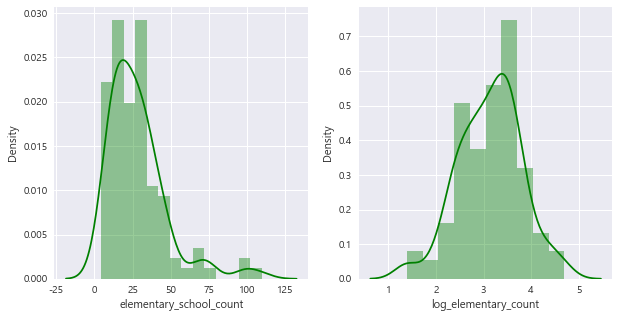

In [20]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(df['elementary_school_count'], ax=axes[0], color="g")
sns.distplot(df['log_elementary_count'], ax=axes[1], color="g")
plt.show()

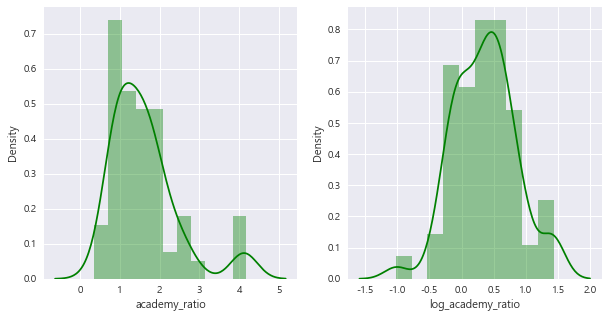

In [21]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(df['academy_ratio'], ax=axes[0], color="g")
sns.distplot(df['log_academy_ratio'], ax=axes[1], color="g")
plt.show()

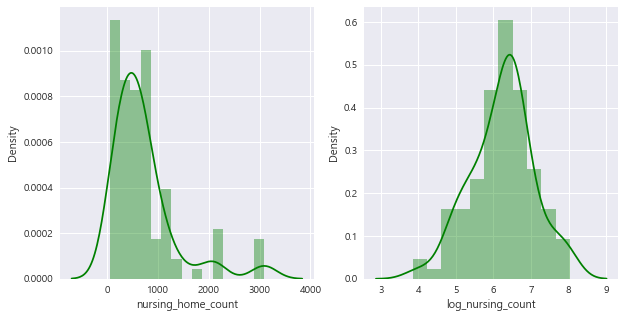

In [22]:
f, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(df['nursing_home_count'], ax=axes[0], color="g")
sns.distplot(df['log_nursing_count'], ax=axes[1], color="g")
plt.show()

로그 변환한 변수들에 대해 pairplot을 그려본 결과는 다음과 같다. 

In [23]:
df_log_confirmed_all = df[df['log_confirmed']>0] #`log_confirmd` 변수의 na, -inf 등의 결측값 제거

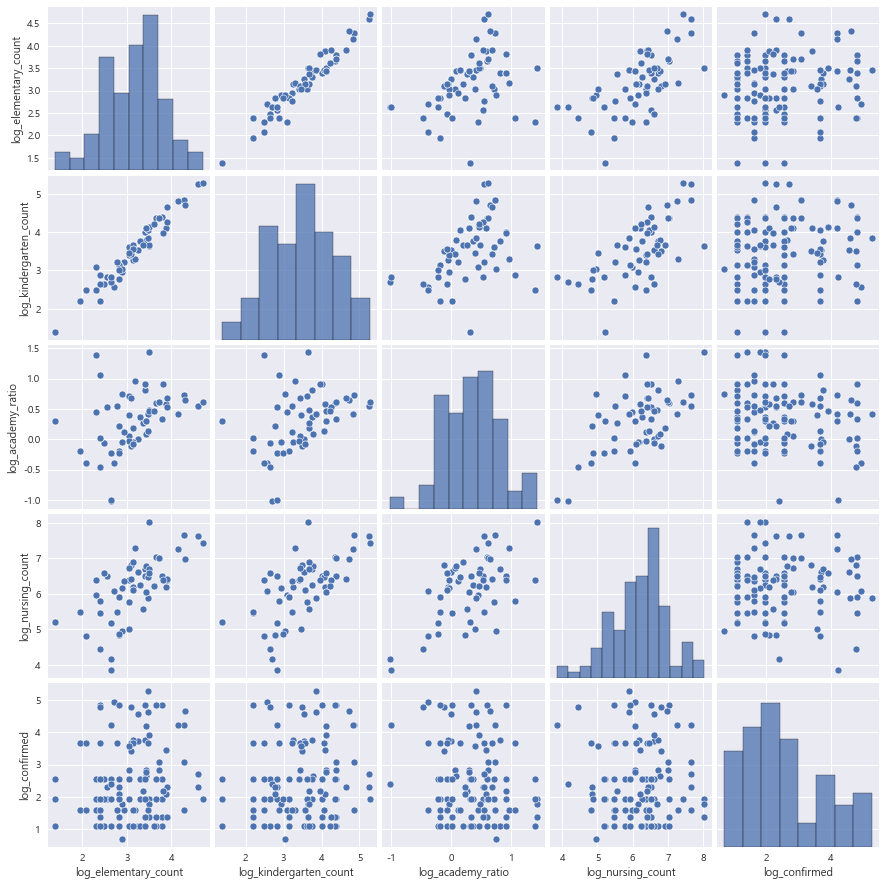

In [24]:
log_num_att = ["log_elementary_count", 'log_kindergarten_count', 'log_academy_ratio', 'log_nursing_count', 'log_confirmed']
sns.pairplot(df_log_confirmed_all[log_num_att])

### 지역별 분석

In [25]:
print(df['province'].unique()) #광역시 및 도를 나타내는 변수

['Seoul' 'Busan' 'Daegu' 'Daejeon' 'Gwangju' 'Sejong' 'Gyeonggi-do'
 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do' 'Jeollanam-do'
 'Gyeongsangbuk-do' 'Gyeongsangnam-do']


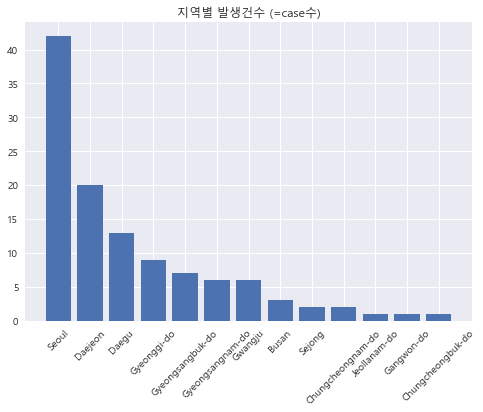

In [26]:
df_region_case_count = df['province'].value_counts()
plt.bar(df_region_case_count.index,df_region_case_count)
plt.title('지역별 발생건수 (=case수)')
plt.xticks(rotation=45)
plt.show()

지역별 발생건수(=case count) 는 **서울** - 대전 - 대구 - 경기도 - 경상북도 - 경상남도 순으로 높다.

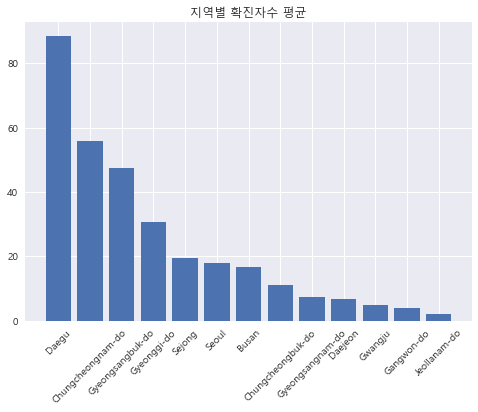

In [27]:
df_region_mean = df.groupby(['province'], as_index=False).mean()
df_region_mean_confirmed = df_region_mean[["province", "confirmed"]] #feature 1
df_region_mean_confirmed = df_region_mean_confirmed.sort_values(by="confirmed", ascending=False)
plt.bar(df_region_mean_confirmed['province'],df_region_mean_confirmed['confirmed'])
plt.title('지역별 확진자수 평균')
plt.xticks(rotation=45)
plt.show()

지역별 확진자수 평균은 **대구** - 충청남도 - 경상북도 - 경기도 - 세종 - 서울 순으로 높다.

지역별 case 발생건수는 서울이 가장 높았으나, 확진자 수가 4000명 이상인(+ 감염경로가 신천지인) 4개의 obs를 데이터셋에서 제외했음에도 불구하고  
case 한 건당 발생한 확진자수의 평균은 대구가 가장 높았다.

이는 **대구의 집단감염 규모가 가장 컸음**을 알 수 있다.

  
### 지도에 확진자수 나타내기  
  
이상치(신천지 case)를 포함한 데이터를 사용했다.

In [29]:
import folium

In [30]:
mapping = dat.loc[:,['lon', 'lat', 'confirmed']]
mapping.head()

,lon,lat,confirmed
0,126.992652,37.538621,139
1,126.901384,37.482080,119
2,126.930121,37.481735,30
3,126.884387,37.508163,95
4,126.894343,37.481059,41


In [31]:

m = folium.Map(location=[36.4015011,128.40894657], zoom_start=7.4)
for i in range(0,len(mapping)):
    folium.CircleMarker(
    location=[mapping.loc[i,'lat'], mapping.loc[i,'lon']],
    radius=mapping.loc[i,'confirmed']/50,
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(m)
m


코로나 감염 케이스는 **서울을 비롯한 수도권**, 그리고 **대구·경북** 지방에 집중되어 있음을 알 수 있다.

### 감염경로별 분석  

In [32]:
dat_infection_mean = dat.groupby(['infection_case'], as_index=False).mean()
dat_infection_mean.head()

,infection_case,id,group,confirmed,lat,lon,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,log_elementary_count,log_kindergarten_count,log_academy_ratio,log_nursing_count,log_confirmed
0,Anyang Gunpo Pastors Group,2000011.0,True,22.0,37.381784,126.936150,41.0,79.0,4.0,1.86,12.88,5.1,1099.0,3.713572,4.369448,0.620576,7.002156,3.091042
1,Biblical Language study meeting,1000026.0,True,3.0,37.524623,126.843118,30.0,43.0,0.0,2.26,13.55,5.5,816.0,3.401197,3.761200,0.815365,6.704414,1.098612
2,Bonghwa Pureun Nursing Home,6000003.0,True,68.0,36.927570,128.909900,14.0,17.0,0.0,0.37,35.26,20.0,47.0,2.639057,2.833213,-0.994252,3.850148,4.219508
3,Bundang Jesaeng Hospital,2000010.0,True,22.0,37.388330,127.121800,72.0,127.0,3.0,2.08,13.52,5.6,2095.0,4.276666,4.844187,0.732368,7.647309,3.091042
4,Changnyeong Coin Karaoke,6100006.0,True,7.0,35.541270,128.500800,17.0,20.0,0.0,0.80,29.80,18.4,129.0,2.833213,2.995732,-0.223144,4.859812,1.945910


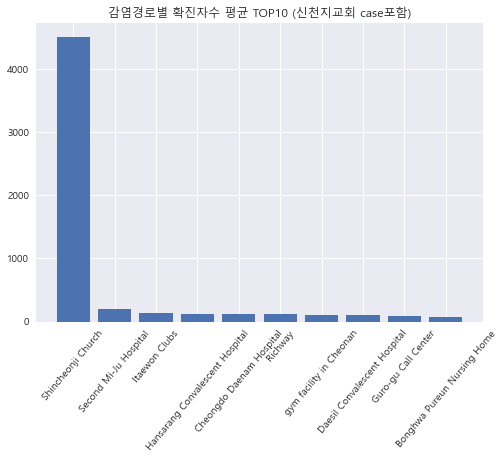

In [33]:
dat_infection_mean_sorted = dat_infection_mean.sort_values(by="confirmed", ascending=False)
dat_infection_mean_top10 = dat_infection_mean_sorted[0:10]
plt.bar(dat_infection_mean_top10['infection_case'],dat_infection_mean_top10['confirmed'])
plt.title('감염경로별 확진자수 평균 TOP10 (신천지교회 case포함)')
plt.xticks(rotation=50)
plt.show()

outlier라고 판단되어 제거했던 신천지 케이스들을 포함하여 그래프를 그려본 결과, **신천지 교회**로 인해 발생한 확진자수 평균이 압도적으로 컸다.  
신천지 교회 - 제2미주병원(정신병동) - 이태원클럽 - 한사랑요양병원 - 청도대남병원(정신병동) -  ... 순임을 알 수 있다.  

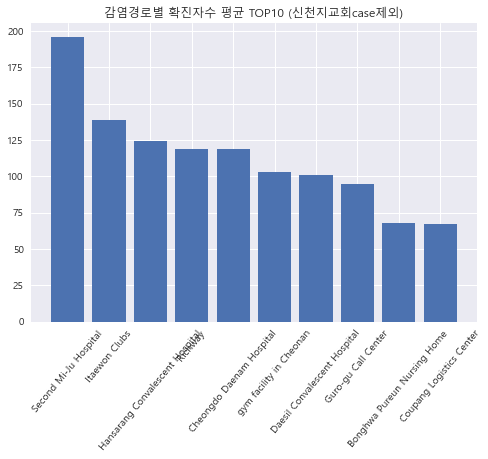

In [34]:
df_infection_mean = df.groupby(['infection_case'], as_index=False).mean()
df_infection_mean_sorted = df_infection_mean.sort_values(by="confirmed", ascending=False)
df_infection_mean_top10 = df_infection_mean_sorted[0:10]
plt.bar(df_infection_mean_top10['infection_case'],df_infection_mean_top10['confirmed'])
plt.title('감염경로별 확진자수 평균 TOP10 (신천지교회case제외)')
plt.xticks(rotation=50)
plt.show()

신천지 교회 케이스를 제외하고 그래프를 그려본 결과는 다음과 같다.
장기 입원병동, 요양병원 등의 **의료시설**에서 집단감염이 발생한 케이스가 많음을 알 수 있다.

### 지역별 집단감염 위험성 분석
  
* Feature = `school_count` = `elementary_school_count` + `kindergarten_count` 생성
  : `elementary_school_count`와 `kindergarten_count`간 상관관계가 매우 크므로 다중공선성 문제가 발생할 가능성이 매우 높다. 둘 중 하나의     변수를 삭제하거나 새로운 feature를 만드는 것이 좋은데, 후자를 선택하였다.  
    

1. 학교 수에 따른 집단감염 위험성 분석

In [35]:
df["school_count"] = df["elementary_school_count"] + df["kindergarten_count"]
dat["school_count"] = dat["elementary_school_count"] + dat["kindergarten_count"]

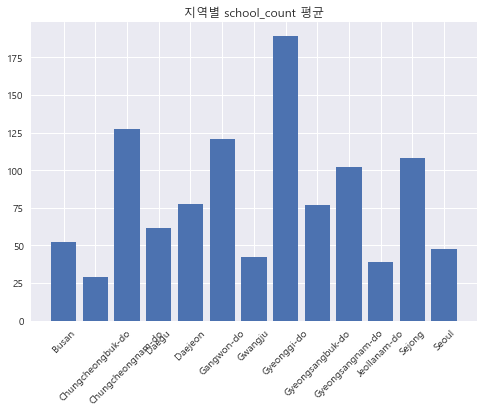

In [36]:
df_school_mean = df.groupby(['province'], as_index=False).mean()
plt.bar(df_school_mean['province'],df_school_mean['school_count'])
plt.title('지역별 school_count 평균')
plt.xticks(rotation=45)
plt.show()

지역별 학교(유치원 + 초등학교)수 평균은 **경기도** 가 가장 높았다.  
즉, 개학을 강행했을 때 학교로 인한 집단감염이 가장 발생하기 쉬운 지역은 경기도를 가리키고 있음을 알 수 있다.

2. 학원 비율에 따른 집단감염 위험성 분석

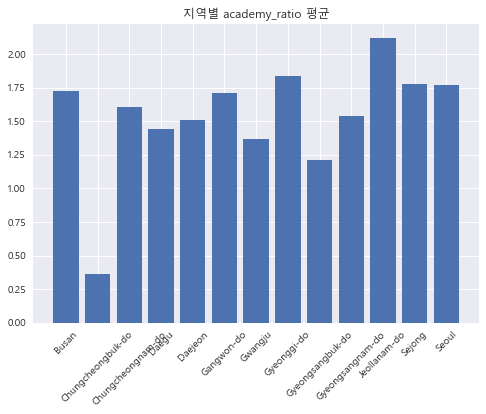

In [37]:
df_academy_mean = df.groupby(['province'], as_index=False).mean()
plt.bar(df_academy_mean['province'],df_academy_mean['academy_ratio'])
plt.title('지역별 academy_ratio 평균')
plt.xticks(rotation=45)
plt.show()

지역별 학원비율의 평균은 충청북도가 확연하게 낮을 뿐, 다른 지역들은 비슷한 값을 가지고 있음을 알 수 있다.  
그나마 가장 높은 비율을 가지고 있는 지역은 **전라남도**이며,  
이는 학원으로 인한 집단감염이 가장 발생하기 쉬운 지역으로 전라남도를 가리키고 있음을 알 수 있다.

### 지역별 중증환자 발생 가능성 분석  
  
1. 노년인구 비율에 따른 중증환자 발생 가능성 분석  
`elderly_population_ratio`가 높을수록 중증환자가 발생할 가능성이 높다고 판단가능하다.  
(일반적으로 COVID-19는 노년층 환자에게 치명적이라고 알려져있기 때문이다.)

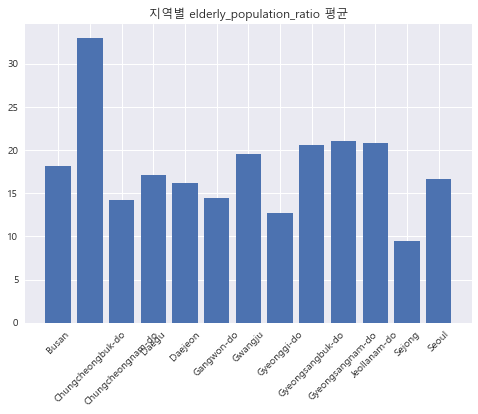

In [38]:
df_elepop_mean = df.groupby(['province'], as_index=False).mean()
plt.bar(df_elepop_mean['province'],df_elepop_mean['elderly_population_ratio'])
plt.title('지역별 elderly_population_ratio 평균')
plt.xticks(rotation=45)
plt.show()

지역별 노인인구의 비율은 **충청북도**가 가장 높았다. 즉 COVID-19로 인해 지역 내에서 중증환자가 발생할 가능성이 가장 높은 지역은 충청북도라고 할 수 있다.

### 요양병원 수에 따른 지역별 집단감염 및 중증환자 발생 가능성 분석

요양병원 이용자는 대부분 노인인구이므로 요양병원 수가 많을 수록 **노인인구의 집단감염** 및 그로 인한 **중증환자** 발생 가능성이 가장 높다고 할 수 있다.

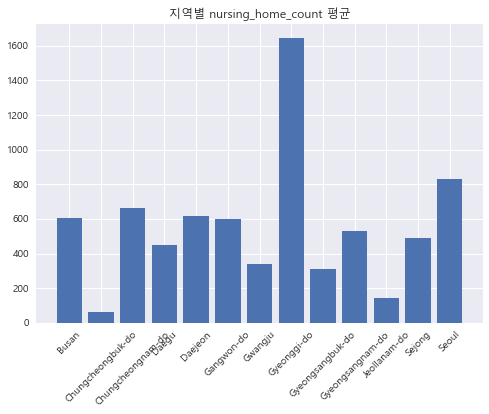

In [39]:
df_nursing_mean = df.groupby(['province'], as_index=False).mean()
plt.bar(df_nursing_mean['province'],df_nursing_mean['nursing_home_count'])
plt.title('지역별 nursing_home_count 평균')
plt.xticks(rotation=45)
plt.show()

지역별 요양병원 수는 **경기도**가 압도적으로 높았다. 즉 요양병원에서의 집단감염 및 중증환자 발생 가능성이 가장 높은 지역은 **경기도**이다. 

### 추세 파악

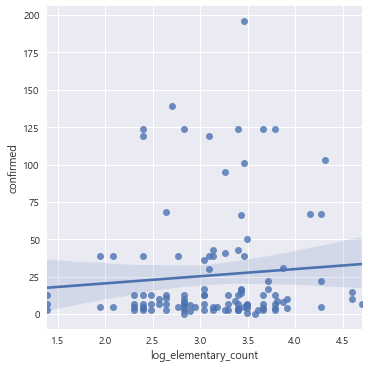

In [40]:
sns.lmplot(x='log_elementary_count', y='confirmed', data=df)

주요 변수들과 `confirmed` 간의 선형관계를 파악하고자 했으나 분포가 퍼져있어서 뚜렷하게 나타나진 않는다. 
대표적으로 `log_elementary_count`와 `confirmed`의 plot을 살펴보자면 다음과 같고, 약간의 양의 선형관계를 볼 수 있다.

### 수도권 케이스 분석

In [41]:
# 수도권 지역 데이터셋 분리
df_sudo = df[(df['province'] == "Seoul") | (df['province'] == "Gyeonggi-do")] 
df_sudo.describe()

,id,confirmed,lat,lon,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,log_elementary_count,log_kindergarten_count,log_academy_ratio,log_nursing_count,log_confirmed,school_count
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.176488e+06,20.137255,37.526073,126.973731,28.333333,44.333333,1.431373,1.783333,15.999608,6.590196,974.686275,3.105270,3.427979,0.440134,6.570637,-inf,72.666667
std,3.850097e+05,29.519498,0.084685,0.078038,21.493875,42.970067,1.590659,1.046303,3.502331,2.113315,814.234082,0.712462,0.875742,0.510451,0.813695,NaN,64.284265
min,1.000001e+06,0.000000,37.237600,126.775254,4.000000,4.000000,0.000000,0.680000,10.500000,3.800000,147.000000,1.386294,1.386294,-0.385662,4.990433,-inf,8.000000
25%,1.000015e+06,4.500000,37.487544,126.933714,14.000000,17.000000,0.000000,1.000000,13.520000,5.350000,501.500000,2.639057,2.833213,0.000000,6.217062,1.497866,31.000000
50%,1.000023e+06,7.000000,37.559649,126.977079,23.000000,34.000000,1.000000,1.430000,15.120000,6.400000,728.000000,3.135494,3.526361,0.357674,6.590301,1.945910,58.000000
75%,1.000032e+06,17.000000,37.562405,127.009914,33.000000,43.000000,3.000000,2.055000,18.270000,7.000000,1089.500000,3.496508,3.761200,0.720202,6.993436,2.833213,72.000000
max,2.000019e+06,139.000000,37.758635,127.161627,99.000000,192.000000,6.000000,4.180000,26.000000,13.000000,3088.000000,4.595120,5.257495,1.430311,8.035279,4.934474,291.000000


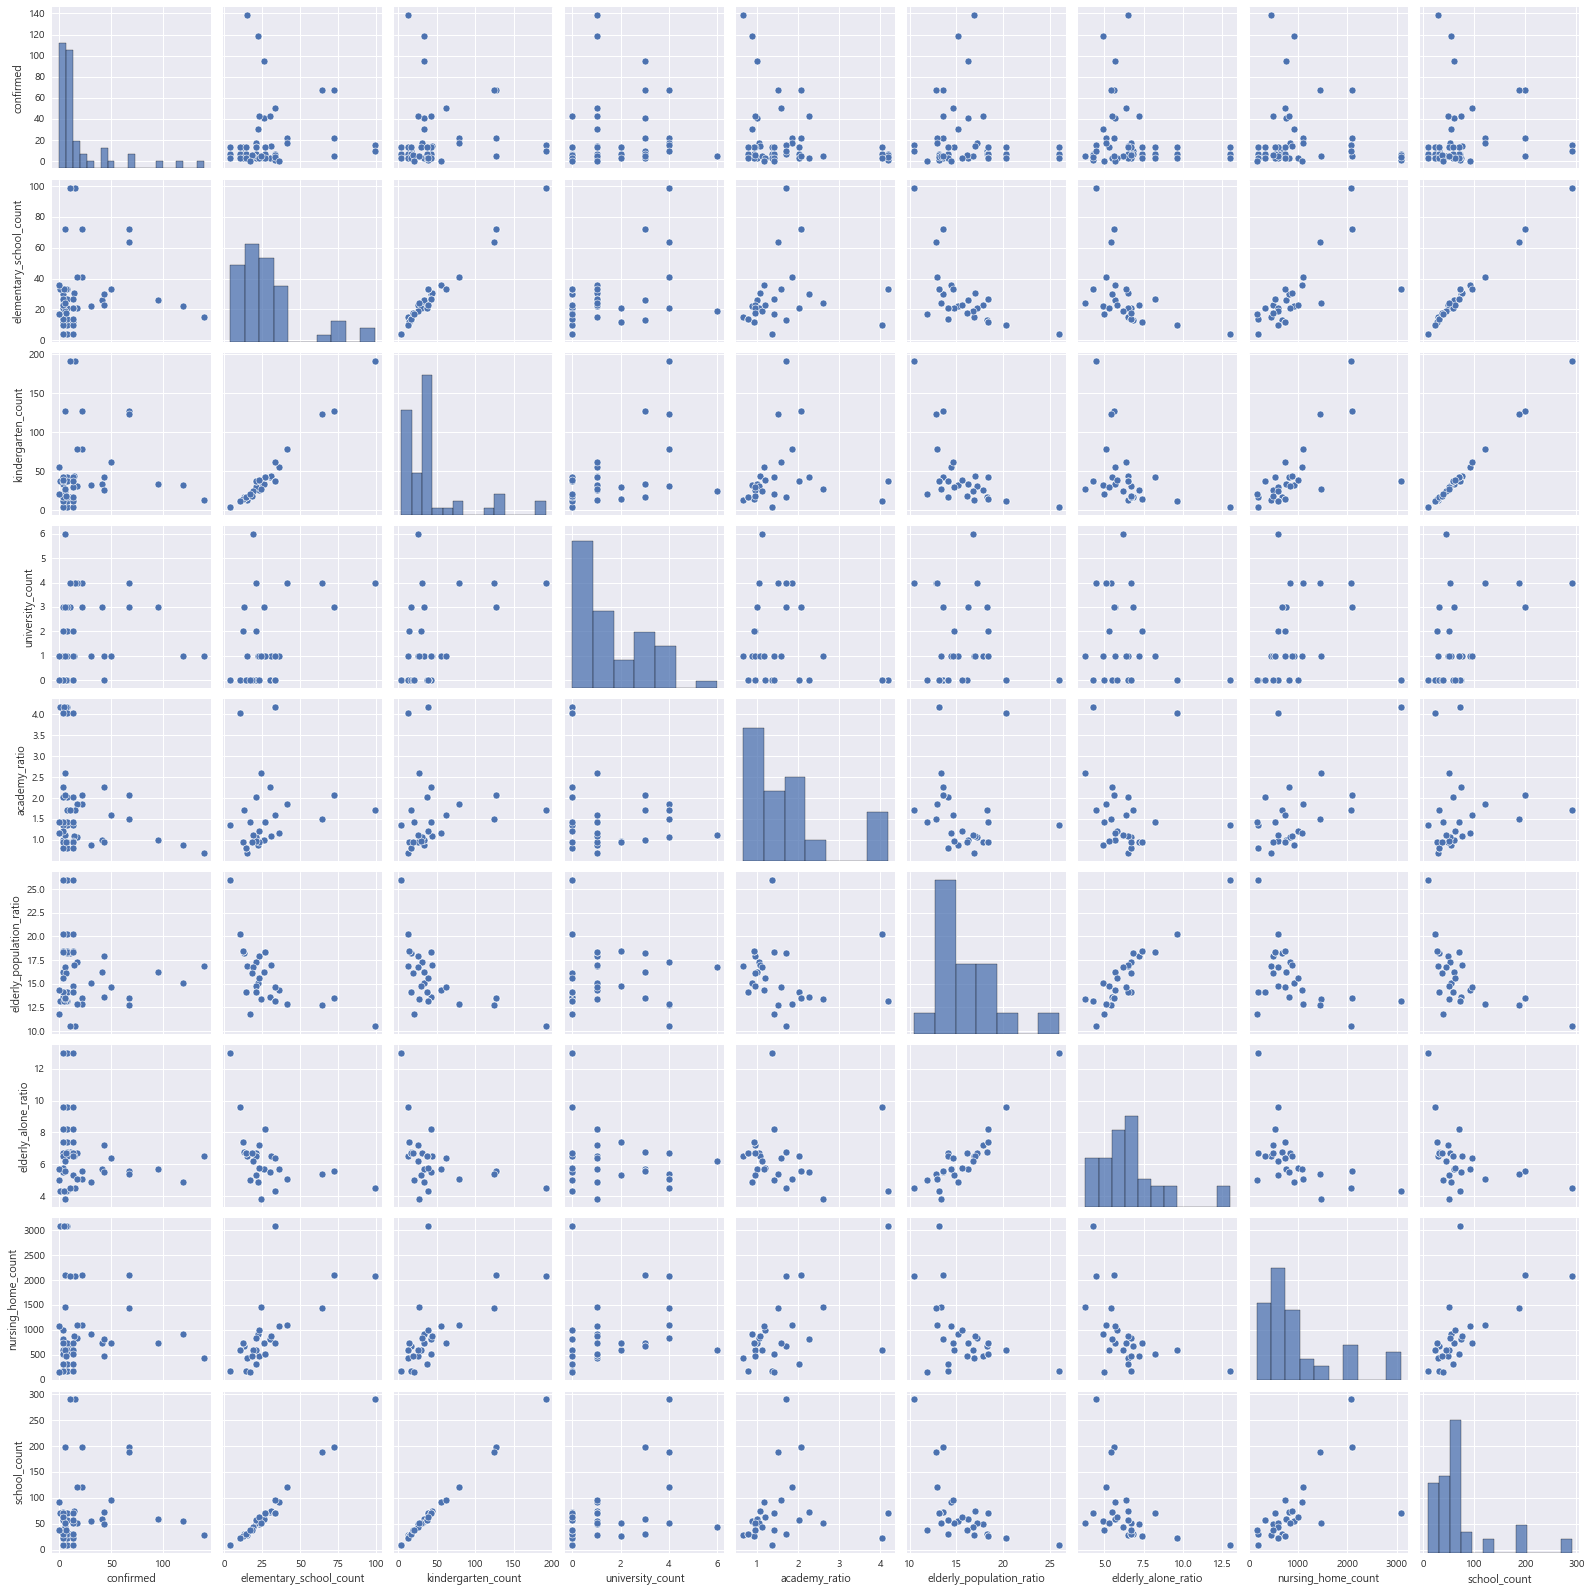

In [42]:
num_att.append('school_count')
sns.pairplot(df_sudo[num_att])

집단감염의 감염지가 되기 쉬운 유치원, 초등학교(`elementary_school_count`)와 사설학원비율(`academy_ratio`) 변수 간에 약간의 선형관계가 있어 보이기에 확진자수(`confirmed`)와 연결시켜 분석해봤다.

<AxesSubplot:xlabel='school_count', ylabel='academy_ratio'>

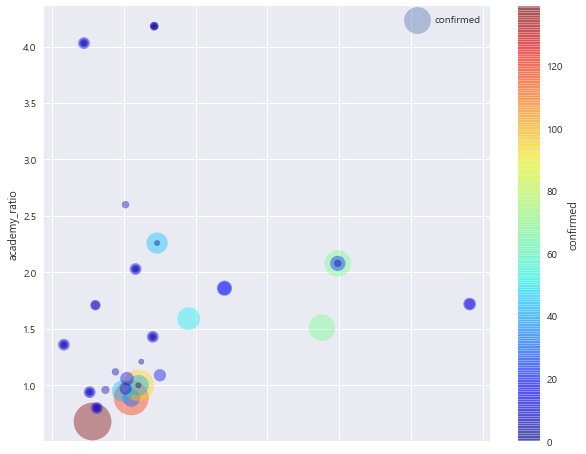

In [43]:
df_sudo.plot(kind="scatter", x="school_count", y='academy_ratio', alpha=0.4, s=df_sudo['confirmed']*10, label='confirmed', figsize=(10,8),
        c = 'confirmed', cmap=plt.get_cmap("jet"), colorbar=True)

수도권의 경우 학교 수(`school_count`)가 많으면 같은 구역 내의 인구대비 사설학원 비율(`academy_ratio`) 또한 높음을 알 수 있다. 대체로 학교 수와 사설학원 비율이 높으면 확진자 수(`confirmed`) 또한 큰 편이지만 확진자 수가 가장 많았던 케이스(red point)의 경우 학교수나 사설학원비율과 큰 관련이 없었음을 볼 수 있다. (전파 경로가 학교나 학원이 아닌 케이스들도 많이 존재하기 때문)

In [44]:
mapping_s = df_sudo.loc[:,['lon', 'lat', 'confirmed']]
mapping_s.reset_index(drop=True, inplace=True)

In [45]:

m_sudo = folium.Map(location=[37.4778293,127.0345886], zoom_start=10)
for i in range(0,len(mapping_s)):
    folium.CircleMarker(
    location=[mapping_s.loc[i,'lat'], mapping_s.loc[i,'lon']],
    radius=mapping_s.loc[i,'confirmed']/5,
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(m_sudo)
m_sudo


주로 경기도 보단 **서울** 또는 **서울과 가까운 수도권** 내에서 집단 감염이 주로 발생했음을 볼 수 있다.

### 대구·경북 지역 케이스 분석

In [46]:
# 대구 경북 지역 데이터셋 분리
df_gyeong = df[(df['province'] == "Daegu") | (df['province'] == "Gyeongsangnam-do") | (df['province'] == "Gyeongsangbuk-do")]
df_gyeong.describe()

,id,confirmed,lat,lon,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,log_elementary_count,log_kindergarten_count,log_academy_ratio,log_nursing_count,log_confirmed,school_count
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,3.623082e+06,58.730769,35.823423,128.553999,28.230769,46.692308,2.538462,1.402308,18.999615,9.623077,430.538462,3.143144,3.542499,0.242328,5.763749,3.547150,74.923077
std,2.471326e+06,53.056617,0.320359,0.255063,20.628733,39.735897,3.202883,0.603485,7.548340,5.194482,356.440428,0.632655,0.802600,0.465380,0.827998,1.166425,60.055923
min,1.200002e+06,3.000000,35.164845,127.912700,7.000000,9.000000,0.000000,0.370000,9.080000,3.900000,47.000000,1.945910,2.197225,-0.994252,3.850148,1.098612,16.000000
25%,1.200004e+06,11.500000,35.788032,128.495775,16.250000,17.250000,0.000000,0.952500,13.070000,6.125000,172.000000,2.787745,2.847503,-0.049477,5.127856,2.420086,33.000000
50%,3.600004e+06,39.000000,35.883950,128.590354,26.500000,41.000000,1.500000,1.340000,16.225000,7.550000,367.500000,3.268346,3.702748,0.292670,5.906567,3.663562,68.500000
75%,6.000010e+06,114.500000,35.885592,128.670965,32.000000,61.000000,3.000000,1.695000,23.675000,11.850000,574.500000,3.465736,4.110874,0.527025,6.351066,4.738123,92.000000
max,6.100007e+06,196.000000,36.927570,129.017508,110.000000,195.000000,10.000000,2.880000,36.550000,21.000000,1701.000000,4.700480,5.273000,1.057790,7.438972,5.278115,305.000000


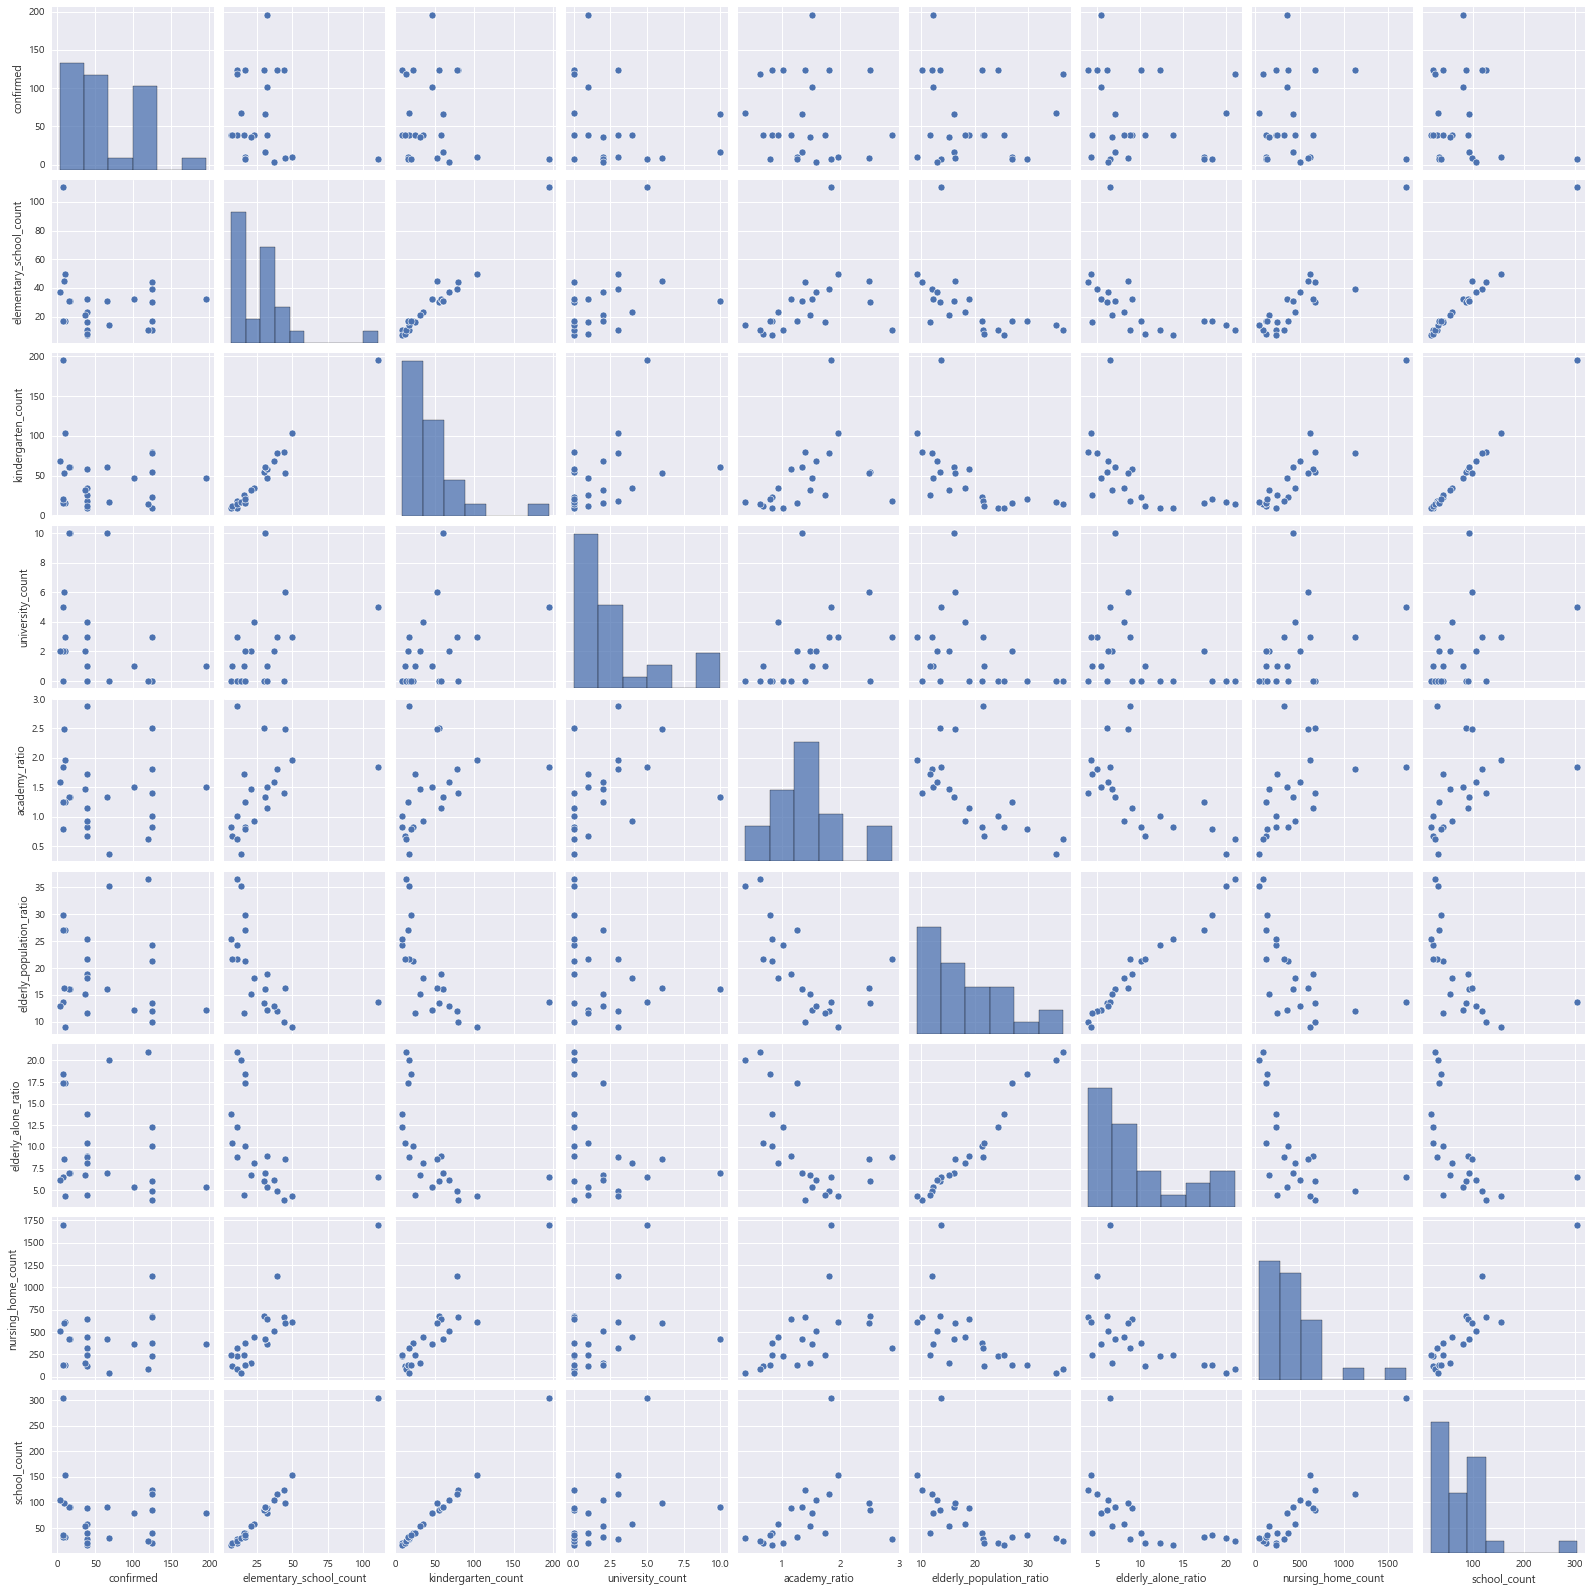

In [47]:
sns.pairplot(df_gyeong[num_att])

<AxesSubplot:xlabel='school_count', ylabel='academy_ratio'>

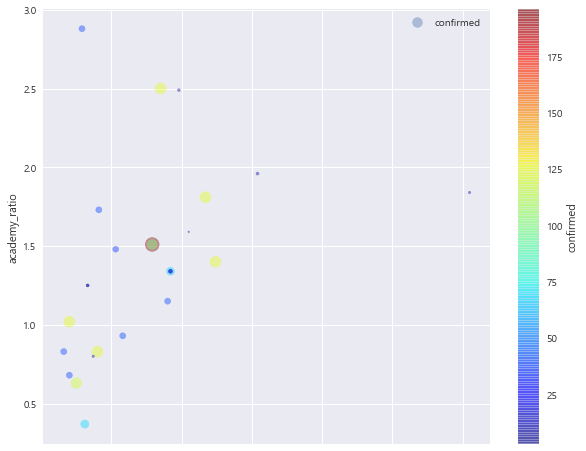

In [48]:
df_gyeong.plot(kind="scatter", x="school_count", y='academy_ratio', alpha=0.4, s=df_gyeong['confirmed'], label='confirmed', figsize=(10,8),
        c = 'confirmed', cmap=plt.get_cmap("jet"), colorbar=True)

대구경북도 수도권과 마찬가지로 학교 수(`school_count`)가 많으면 같은 구역 내의 인구대비 사설학원 비율(`academy_ratio`) 또한 높음을 알 수 있다. 또한 몇몇 케이스의 경우 학교 수와 사설학원 비율이 높았던 곳에서 확진자(`confirmed`) 또한 많았다. (감염 경로가 학교나 학원이 아닌 케이스도 존재하기 때문)

In [49]:
# 신천지교회 감염 케이스 포함
dat_gyeong = dat[(dat['province'] == "Daegu") | (dat['province'] == "Gyeongsangnam-do") | (dat['province'] == "Gyeongsangbuk-do")]
mapping_g = dat_gyeong.loc[:,['lon', 'lat', 'confirmed']]
mapping_g.reset_index(drop=True, inplace=True)

In [50]:
m_gyeong = folium.Map(location=[35.8520219,128.6877247], zoom_start=8)
for i in range(0,len(mapping_g)):
    folium.CircleMarker(
    location=[mapping_g.loc[i,'lat'], mapping_g.loc[i,'lon']],
    radius=mapping_g.loc[i,'confirmed']/100,
    color='red',
    fill=True,
    fill_color='red'
    ).add_to(m_gyeong)
m_gyeong

대구, 경북 지역의 경우 대구를 중심적으로 집단감염이 발생했음을 알 수 있고 역시나 **신천지교회** 감염 케이스의 규모가 압도적으로 크다.

## 3. Feature Engineering 결과 & Insight & 한계점
  
  
위 자료는 집단감염과 지역발생 케이스만을 다루고 있다.  
  
* Feature1 = `log_elementary_count`  
  Feature2 = `log_kinderagarten_count`  
  Feature3 = `log_academy_ratio`  
  Feature4 = `log_nursing_count`  
  Feature5 = `log_confirmed`  
  : 정규분포로 근사시키기 위해 log transformation을 진행했다.
  
  
* Feature6 = 지역(`province`)별 확진자수(`confirmed`) 평균  
  : 대구의 집단감염 규모가 가장 컸음을 알 수 있다.  
  
  
* Feature7 = 감염경로(`infection_case`)별 확진자수(`confirmed`) 평균  
  : 신천지 교회로 인해 발생한 확진자수 평균이 압도적으로 크고, 장기 입원병동이나 요양병원과 같은 의료시설에서 집단감염이 발생한 케이스가 많음을 알 수 있다.
  
  
* Feature8 = 학교수 (초등학교 수 `elementary_school_count` + 유치원 수 `kindergarten_count`)  
  : `elementary_school_count`와 `kindergarten_count`의 상관관계가 매우 높으므로 다중공선성 문제를 일으킬 수 있다.
    그렇기에 두 개 변수를 함께 사용하지 않고 두 변수로 새로운 feature `school_count`를 생성하여 사용하였다.
  
  
* Feature9 = 지역(`province`)별 학교수(`school_count`) 평균  
  : 개학 강행으로 인해 집단감염이 발생할 가능성이 가장 높은 지역은 경기도이다.  
  
  
* Feature10 = 지역(`province`)별 학원비율(`academy_ratio`) 평균
  : 학생들의 학원 등원으로 인해 집단감염이 발생할 가능성이 가장 높은 지역은 전라남도이다.  
  
  
* Feature11 = 지역(`province`)별 요양병원수(`nursing_home_count`) 평균  
  : 요양병원에서의 노인인구의 집단감염 및 그로인한 중증환자 발생 가능성이 가장 높은 지역은 경기도이다.  
    
  
* 유의사항  
  1. outlier로 잡힌 신천지교회 케이스 (`confirmed`>4000)를 모델링 시 자료에 포함시킬 지에 대한 판단은 두 경우 직접 모델링 해본 이후에 결정하면 좋을 것 같다. outlier이긴 하나 국내 COVID-19 발생 과정에 있어서 제외시키기에는 의미가 큰 obs라고 생각되기 때문이다.  
  
  
* 한계점
  1. 수정 전 데이터를 사용했기 때문에 분석에 오류가 있을 수도 있습니다...! (이미 진행을 많이 한 상태라 데이터를 바꾸지 않았습니다 ㅜ ㅜ)
  2. folium 을 활용하여 지도를 그려보았으나 업로드에 문제가 생겨서 코드 및 이미지 첨부로 대체하였습니다.